In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("rocities.txt", "r").read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
count_chars = len(chars)
stoi = {s: i + 1 for i,s in enumerate(chars)}
stoi['*'] = 0
itos = {i: s for s,i in stoi.items()}
count_all_chars = len(stoi.keys())

In [4]:
# creating the training set

In [5]:
inputs = []
targets = []

In [6]:
for word in words[:1]:
    word = ['*'] + list(word) + ['*']
    for ch1, ch2 in zip(word,word[1:]):
        r = stoi[ch1]
        c = stoi[ch2]
        inputs.append(r)
        targets.append(c)

In [7]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
inputs, targets

(tensor([ 0,  4,  1, 10, 11,  9, 11, 19,  8, 23, 15, 11]),
 tensor([ 4,  1, 10, 11,  9, 11, 19,  8, 23, 15, 11,  0]))

In [19]:
import torch.nn.functional as F
# one-hot encode the int tensors
xenc = F.one_hot(inputs, num_classes=count_all_chars)
print(xenc.shape)

torch.Size([12, 31])


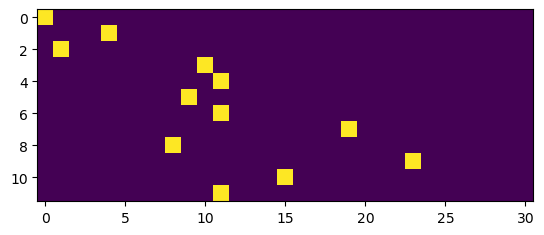

In [13]:
plt.imshow(xenc)

In [20]:
print(xenc.dtype)
# for nn we need float
xenc = xenc.float()
print(xenc.dtype)

torch.int64
torch.float32


In [23]:
W = torch.randn(size=(count_all_chars, 1))
W

tensor([[ 1.1066e+00],
        [ 1.4413e+00],
        [ 6.4801e-01],
        [-1.8258e+00],
        [ 6.7701e-01],
        [-2.6204e-01],
        [ 5.7082e-01],
        [-1.1707e+00],
        [ 1.5221e+00],
        [-7.4402e-01],
        [ 1.1818e+00],
        [-5.3148e-01],
        [ 9.8551e-01],
        [ 6.1625e-01],
        [ 6.3127e-01],
        [-8.1725e-01],
        [ 2.0809e+00],
        [ 1.5024e+00],
        [-3.7580e-01],
        [-2.3924e-01],
        [-1.4660e+00],
        [ 2.2441e+00],
        [ 7.7324e-01],
        [-1.1087e+00],
        [ 9.4468e-02],
        [-4.8750e-01],
        [ 9.4507e-01],
        [ 3.6849e-01],
        [-1.1427e+00],
        [-1.5951e-03],
        [-6.2787e-01]])

In [25]:
xenc @ W

tensor([[ 1.1066],
        [ 0.6770],
        [ 1.4413],
        [ 1.1818],
        [-0.5315],
        [-0.7440],
        [-0.5315],
        [-0.2392],
        [ 1.5221],
        [-1.1087],
        [-0.8172],
        [-0.5315]])

In [26]:
W = torch.randn(size=(count_all_chars, count_all_chars))
xenc @ W

tensor([[ 0.6095,  0.1643, -1.8273, -0.5250,  0.8390, -0.3782, -0.0610, -0.4065,
         -0.0264, -0.0643,  2.4813, -1.8960, -0.1972, -0.1574, -0.4759, -2.5612,
         -0.1249, -0.0748,  0.3756,  0.4354,  1.1458, -0.3769,  1.0774,  1.2276,
          0.5052,  3.3019,  1.2592,  1.0743,  1.0259, -1.0161,  0.2411],
        [ 0.1571,  0.1472, -0.2804,  0.5836,  0.2204,  0.2379, -0.8709, -0.8788,
          1.0630,  0.2674,  1.2172,  0.3791,  0.9386, -1.3777, -0.5507, -0.0157,
          2.3314,  0.5354, -0.3529, -0.4326,  0.4138, -2.3835, -0.9140,  0.7080,
         -0.0056,  0.5818,  0.4125, -0.1404,  0.4093,  0.1148,  0.9578],
        [ 1.2360,  0.7968, -0.1288, -0.8328, -0.7874,  0.1000, -0.5826,  0.9550,
         -0.1100, -0.4791, -1.4083, -0.6750,  0.0875,  0.0784,  1.5426, -0.6579,
         -0.4705,  1.4175,  2.0805, -0.0568,  0.2056,  0.2990, -0.2630, -0.2667,
          0.7125,  1.5019,  0.1431, -0.2221,  0.2966, -0.3424,  0.4939],
        [-1.3549, -0.0927,  1.6302, -0.4570, -0.1868

In [27]:
logits = xenc @ W  # log-counts
counts = logits.exp()  # equivalent to N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0232, 0.0148, 0.0020, 0.0074, 0.0291, 0.0086, 0.0118, 0.0084, 0.0123,
         0.0118, 0.1505, 0.0019, 0.0103, 0.0108, 0.0078, 0.0010, 0.0111, 0.0117,
         0.0183, 0.0195, 0.0396, 0.0086, 0.0370, 0.0430, 0.0209, 0.3419, 0.0443,
         0.0368, 0.0351, 0.0046, 0.0160],
        [0.0237, 0.0234, 0.0153, 0.0363, 0.0252, 0.0257, 0.0085, 0.0084, 0.0586,
         0.0264, 0.0683, 0.0296, 0.0517, 0.0051, 0.0117, 0.0199, 0.2083, 0.0346,
         0.0142, 0.0131, 0.0306, 0.0019, 0.0081, 0.0411, 0.0201, 0.0362, 0.0306,
         0.0176, 0.0305, 0.0227, 0.0527],
        [0.0671, 0.0432, 0.0171, 0.0085, 0.0089, 0.0215, 0.0109, 0.0506, 0.0175,
         0.0121, 0.0048, 0.0099, 0.0213, 0.0211, 0.0911, 0.0101, 0.0122, 0.0804,
         0.1560, 0.0184, 0.0239, 0.0263, 0.0150, 0.0149, 0.0397, 0.0875, 0.0225,
         0.0156, 0.0262, 0.0138, 0.0319],
        [0.0044, 0.0156, 0.0871, 0.0108, 0.0142, 0.0452, 0.0070, 0.0072, 0.1053,
         0.0158, 0.0399, 0.0146, 0.0123, 0.0285, 0.0642, 0.0080,

In [28]:
probs[0].sum()

tensor(1.0000)

In [31]:
probs.shape

torch.Size([12, 31])